# Load libraries

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras import backend as K

# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# pretrained nets
from keras.applications import Xception
from keras.applications.xception import preprocess_input, decode_predictions

Using TensorFlow backend.


In [3]:
train_image_files_path = "/keras2production/fruits/Training/"
valid_image_files_path = "/keras2production/fruits/Test/"

# Keras

https://keras.io/

## Pretrained nets

https://keras.io/applications/

### Use Xception

https://keras.io/applications/#usage-examples-for-image-classification-models

In [4]:
model_xception = Xception(weights="imagenet")

In [5]:
model_xception.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [9]:
def classify_image(image):
    img = cv2.imread(image)        
    b,g,r = cv2.split(img)       # get b,g,r
    img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    # images need to be numpy arrays of 299 x 299 color images with 3 channels
    image = image_utils.load_img(image, target_size=(299, 299))
    image = image_utils.img_to_array(image)

    # expand the dimensions to be (1, 3, 224, 224)
    image = np.expand_dims(image, axis=0)

    # scale pixels between -1 and 1, sample-wise
    image = preprocess_input(image)
        
    preds = model_xception.predict(image)
    res = decode_predictions(preds, top=3)
    
    for (i, (imagenetID, label, prob)) in enumerate(res[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

In [7]:
train_images = !find $train_image_files_path -type f -name "*.jpg"

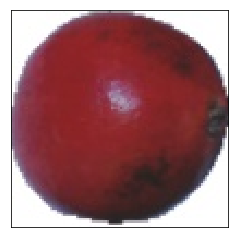

1. croquet_ball: 30.97%
2. pomegranate: 24.32%
3. hip: 9.87%


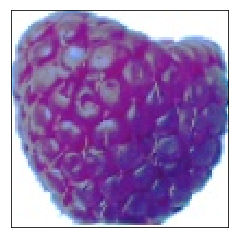

1. strawberry: 97.09%
2. pomegranate: 0.13%
3. pineapple: 0.12%


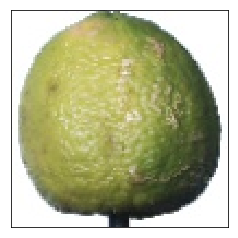

1. lemon: 79.55%
2. orange: 1.18%
3. strawberry: 0.51%


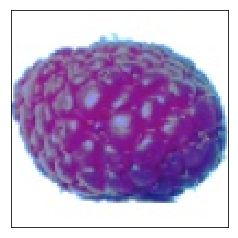

1. strawberry: 89.28%
2. maraca: 0.80%
3. fig: 0.42%


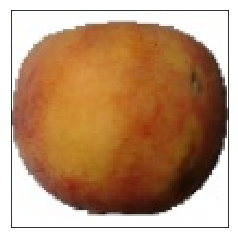

1. lemon: 36.19%
2. Granny_Smith: 9.40%
3. fig: 4.53%


In [10]:
num = 5
train_images_r = random.sample(train_images, num)
for i in range(num):
    classify_image(train_images_r[i])